In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Milan Škriniar,sk SVK,DF,Paris S-G+Inter,fr Ligue 1+it Serie A,0.0,1995.0,112.0,103.0,9325,103.7,0.06,0.06,0.06,0.06,0.06,0.08,0.06,0.08,28.0,23.0,82.14,4.0,14.29,80.77,8.45,35.72,40.38,4.99,0.79,80.77,0.27,0.22,0.04,53.06,246.53,121.18,0.97,0.71,0.01,0.52,0.23,61.06,0.81,0.78,0.04,0.65,0.00,0.01,0.09,0.04,0.65,0.04,0.00,0.00,0.00,0.00,0.00,7001.0,7533.0,92.94,127807.0,38169.0,2585.0,2753.0,94.52,3689.0,3846.0,95.92,586.0,742.0,78.98,0.00,0.01,0.02,-0.01,0.24,3.91,0.24,0.03,3.71,72.64,69.96,2.61,1.75,0.04,0.51,0.13,0.71,0.00,0.00,0.00,0.00,67.51,0.07,0.27,0.00,0.15,0.00,11.35,0.00,-0.5,-0.5,47.20,0.10,0.01,0.01,1.22,0.71,0.03,0.77,0.92,0.00,0.01,5.27,1.21,1.34,1.43,0.83,0.49,0.10,0.76,1.25,0.49,0.99,0.64,2.20,2.66,0.07,61.21,4,0,0,3,1,0
1,1,Maxence Lacroix,fr FRA,DF,Wolfsburg,de Bundesliga,0.0,2000.0,111.0,103.0,9070,100.8,0.06,0.08,0.06,0.08,0.04,0.06,0.04,0.06,75.0,58.0,77.33,17.0,22.67,70.67,8.29,37.50,31.56,2.13,0.84,70.67,0.74,0.58,0.17,40.25,207.32,110.79,0.57,0.47,0.05,0.73,0.26,43.50,0.27,0.87,0.06,0.72,0.02,0.03,0.07,0.02,0.72,0.05,0.00,0.00,0.01,0.00,0.00,4893.0,5859.0,83.51,102529.0,36399.0,1344.0,1562.0,86.11,2923.0,3193.0,91.54,645.0,1011.0,63.80,0.01,0.02,0.03,-0.00,0.22,3.36,0.19,0.02,4.02,58.13,55.23,2.72,2.26,0.03,0.47,0.21,0.11,0.00,0.00,0.00,0.00,48.54,0.18,0.51,0.00,0.14,0.00,10.89,0.00,1.8,1.8,57.18,0.16,0.06,0.02,1.06,0.82,0.01,1.74,1.03,0.00,0.04,5.95,2.48,1.86,1.77,1.20,0.53,0.04,0.89,1.40,0.5

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW'])]
newbie = newbie[newbie['Pos'].isin(['FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,8,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,0.0,2003.0,22,12,1044,11.6,0.43,0.43,0.43,0.43,0.33,0.50,0.33,0.50,33.0,19.0,57.6,14.0,42.4,33.28,0.78,3.10,13.19,18.02,5.60,33.28,2.84,1.64,1.21,25.34,170.60,78.10,2.41,2.07,1.21,4.31,1.21,24.74,7.50,3.28,0.17,2.59,0.00,0.43,0.17,0.09,0.00,0.00,0.00,0.09,0.00,0.09,0.00,162.0,231.0,70.1,2410.0,448.0,91.0,128.0,71.1,52.0,68.0,76.5,9.0,11.0,81.8,0.00,0.17,0.08,-0.17,1.47,0.52,0.60,0.17,1.72,19.91,18.79,1.03,0.00,0.17,0.09,0.60,0.09,0.00,0.00,0.00,0.00,13.97,0.09,0.95,3.62,1.64,0.12,0.26,0.09,1.2,1.2,35.7,0.09,0.00,0.00,0.86,1.12,0.52,0.26,0.34,0.09,0.00,3.36,1.29,2.33,0.78,0.34,0.26,0.17,0.26,0.69,0.43,0.26,0.00,1.03,0.43,0.00,37.5
1,18,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,0.0,2000.0,32,27,2252,25.0,0.32,0.36,0.32,0.36,0.50,0.57,0.50,0.57,44.0,14.0,31.8,26.0,59.1,25.52,0.68,2.44,10.64,12.92,4.72,25.52,1.76,0.56,1.04,17.68,106.92,40.16,1.60,0.92,0.88,2.72,1.20,18.88,5.08,1.72,0.12,1.16,0.00,0.20,0.32,0.04,0.00,0.00,0.00,0.08,0.04,0.00,0.00,250.0,385.0,64.9,3676.0,786.0,125.0,185.0,67.6,89.0,126.0,70.6,14.0,29.0,48.3,0.04,0.08,0.06,-0.04,0.68,0.56,0.16,0.08,0.68,15.40,15.00,0.40,0.00,0.08,0.04,0.48,0.04,0.00,0.00,0.00,0.00,10.00,0.00,0.80,3.16,1.28,0.10,0.25,0.16,-4.4,-4.4,43.9,0.08,0.00,0.00,1.56,0.88,1.04,0.20,0.16,0.00,0.00,2.20,2.16,2.76,0.48,0.12,0.16,0.20,0.12,0.28,0.16,0.36,0.08,0.68,0.44,0.00,42.9
2,23,Elijah Adebayo,eng ENG,FW,Luton Town,eng Premier League,0.0,1998.0,27,16,1419,15.8,0.63,0.63,0.63,0.63,0.37,0.42,0.37,0.42,67.0,18.0,26.9,46.0,68.7,29.24,1.71,3.29,10.89

In [6]:
Vlahovic=forward_players[forward_players['Player']=='Dušan Vlahović']
Vlahovic

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
4,30,Dušan Vlahović,rs SRB,FW,Juventus+Fiorentina+Juventus+Fiorentina,it Serie A,0.0,2000.0,133.0,116.0,18578231,112.1,0.63,0.74,0.5,0.6,0.56,0.67,0.43,0.51,194.0,90.0,46.39,101.0,52.06,30.87,0.64,1.9,13.56,15.79,5.31,30.69,1.73,0.8,0.9,17.84,79.82,29.79,1.13,0.84,0.54,3.35,2.12,24.72,6.74,14.54,2.44,1.47,0.01,0.18,0.37,0.22,1.47,0.17,0.0,0.01,0.1,0.04,0.0,1469.0,2165.0,67.85,22924.0,4103.0,729.0,974.0,74.41,516.0,707.0,72.98,111.0,172.0,64.53,0.06,0.09,0.06,0.02,0.86,0.81,0.48,0.05,1.54,19.31,17.84,1.38,0.07,0.1,0.22,0.53,0.02,0.0,0.0,0.0,0.0,13.1,0.09,0.95,0.0,7.78,0.0,2.6,0.0,8.1,8.2,44.49,0.12,0.01,0.01,1.16,1.77,0.82,0.08,0.13,0.03,0.0,2.29,2.2,2.74,0.34,0.03,0.17,0.14,0.13,0.46,0.33,0.35,0.08,0.42,0.51,0.01,28.8,4,0,0,4,0,0


In [7]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
vlahovic_percentile_ranks = round(players_2021_percentile_ranks.iloc[[4]],0)

# Print the percentile ranks for Declan Rice
vlahovic_percentile_ranks


,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
4,89.0,84.0,84.0,74.0,89.0,84.0,79.0,65.0,72.0,72.0,66.0,75.0,71.0,26.0,32.0,14.0,34.0,36.0,72.0,25.0,30.0,33.0,32.0,27.0,22.0,26.0,30.0,33.0,28.0,80.0,89.0,43.0,57.0,97.0,98.0,28.0,53.0,33.0,81.0,58.0,51.0,36.0,41.0,32.0,95.0,62.0,40.0,75.0,77.0,33.0,77.0,73.0,68.0,70.0,27.0,82.0,83.0,49.0,81.0,80.0,75.0,50.0,26.0,20.0,64.0,25.0,31.0,30.0,38.0,33.0,24.0,23.0,54.0,58.0,45.0,75.0,42.0,18.0,29.0,36.0,38.0,46.0,26.0,31.0,62.0,18.0,98.0,19.0,46.0,18.0,94.0,95.0,68.0,39.0,80.0,91.0,44.0,70.0,84.0,10.0,8.0,57.0,41.0,27.0,68.0,63.0


In [8]:
# Extract the percentile ranks, transpose, and sort them in descending order
vlahovic_percentile_ranks_sorted = vlahovic_percentile_ranks.T.sort_values(by=4, ascending=False)

# Get the top 20 parameters
top_30_params = vlahovic_percentile_ranks.index[:30]
top_30_params_values = vlahovic_percentile_ranks_sorted[4].head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index([4], dtype='int64')
Values:
Shots_on_target_per90         98.0
Goal_Creating_Action_90       98.0
Shot_Creating_Action_per90    97.0
Shot_Goal_per_90              95.0
Npxg_net                      95.0
Xg_net                        94.0
Second_Yellow_Card_per_90     91.0
Goals_per90                   89.0
xG_per90                      89.0
Dispossessed_per_90           89.0
G+A_per90                     84.0
G-PK_per90                    84.0
Offsides_per_90               84.0
xG+xAG_per90                  84.0
Passes_Medium_Att             83.0
Passes_Medium_Cmp             82.0
Passes_Long_Cmp               81.0
Shot-Shot_per_90              81.0
Passes_Long_Att               80.0
Red_Cards_per_90              80.0
Miscontrols_per_90            80.0
npxG_per90                    79.0
Passes_TotDist                77.0
Passes_Total_Att              77.0
Switches_per_90               75.0
Passes_Long_Cmp%              75.0
Tackled_Take_Ons              75.0
Pa

In [9]:
params = [
    'Goals_per90',
    'G+A_per90', 
    'Shot_Creating_Action_per90',
    'npxG_per90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xG+xAG_per90', 
    'Shot_Goal_per_90', 
    'Dispossessed_per_90', 
    'Second_Yellow_Card_per_90', 
    'Red_Cards_per_90', 
    'G-PK_per90', 
    'xG_per90', 
    'Passes_TotDist', 
    'Passes_PrgDist'
]

# Calculate percentile ranks for the players in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Dusan Vlahovic's stats from the percentile ranks DataFrame
vlahovic_percentile_ranks = round(players_percentile_ranks.iloc[[4]],0)

# Print the percentile ranks for Vlahovic
vlahovic_percentile_ranks

,Goals_per90,G+A_per90,Shot_Creating_Action_per90,npxG_per90,Shots_on_target_per90,Goal_Creating_Action_90,xG+xAG_per90,Shot_Goal_per_90,Dispossessed_per_90,Second_Yellow_Card_per_90,Red_Cards_per_90,G-PK_per90,xG_per90,Passes_TotDist,Passes_PrgDist
4,89.0,84.0,97.0,79.0,98.0,98.0,84.0,95.0,89.0,91.0,80.0,84.0,89.0,77.0,73.0


In [10]:
vlahovic_percentile_ranks_list = vlahovic_percentile_ranks.values.flatten().tolist()

vlahovic_percentile_ranks_list

[89.0,
 84.0,
 97.0,
 79.0,
 98.0,
 98.0,
 84.0,
 95.0,
 89.0,
 91.0,
 80.0,
 84.0,
 89.0,
 77.0,
 73.0]

In [11]:
params = [
    'Goals_per90',
    'Goals_+_Assists_per90', 
    'Shot_Creating_Action_per90',
    'NonPenalty_xG_per90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xG_+_Expected_Assisted_Goals_per90', 
    'Shot_Leading_Goal_per_90', 
    'Dispossessed_per_90', 
    'Second_Yellow_Card_per_90', 
    'Red_Cards_per_90', 
    'NonPenalty_Goals_per90', 
    'xG_per90', 
    'Total_Passes_Distances', 
    'Progressive_Passes_Distance'
]
split_params = [param.replace('_', '\n') for param in params]

In [12]:
params = [
    'Goals_per90',
    'G+A_per90', 
    'Shot_Creating_Action_per90',
    'npxG_per90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xG+xAG_per90', 
    'Shot_Goal_per_90', 
    'Dispossessed_per_90', 
    'Second_Yellow_Card_per_90', 
    'Red_Cards_per_90', 
    'G-PK_per90', 
    'xG_per90', 
    'Passes_TotDist', 
    'Passes_PrgDist'
]

In [13]:
image_path = "Vlahovic.jpg"
fdj_cropped = Image.open(image_path)


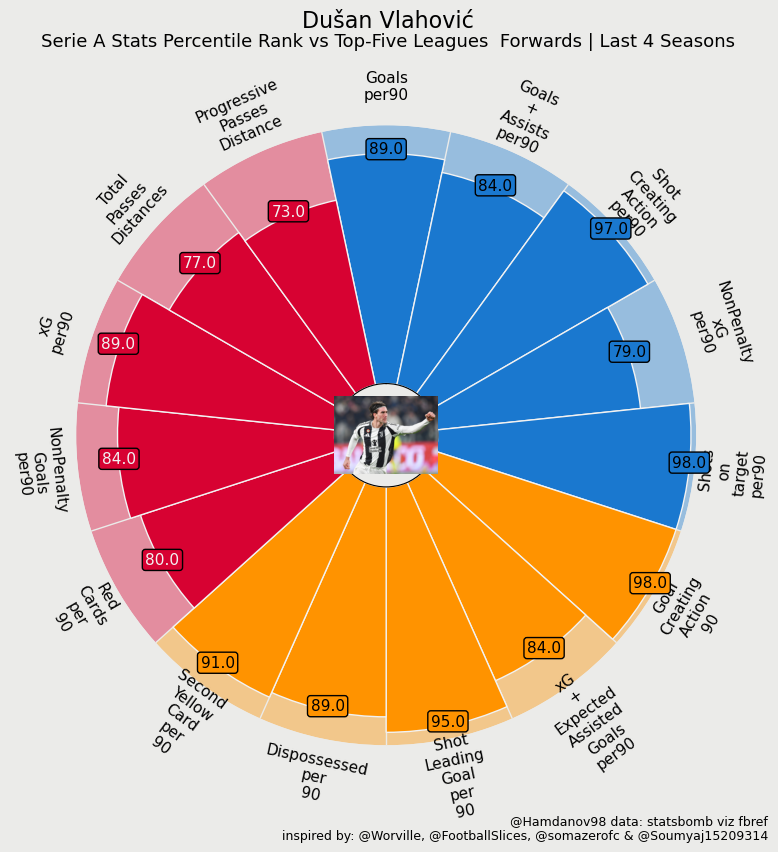

In [14]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    vlahovic_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Dušan Vlahović", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues  Forwards | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Vlahovic_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in forward_players.columns:
        forward_players[feature]=-forward_players[feature]
        
        

In [16]:

# Normalize data
numerical_forward_players = forward_players[params].replace([np.inf, -np.inf], 0)
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_forward_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [17]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=forward_players.index)

In [18]:
# Get vlahovic's row and compute cosine similarity
vlahovic_index = forward_players.index[forward_players['Player'] == 'Dušan Vlahović'][0]
vlahovic_data = transformed_df.loc[vlahovic_index].values.reshape(1, -1)

# Remove vlahovic from the dataset for comparison
transformed_df = transformed_df.drop(index=vlahovic_index)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, vlahovic_data).flatten()
transformed_df['similarity_to_vlahovic'] = similarity_scores

# Get top 10 players most similar to vlahovic
top_similar_players_indices = transformed_df.sort_values('similarity_to_vlahovic', ascending=False).index
top_similar_players = forward_players.loc[top_similar_players_indices]

In [20]:
# Visualize the resultsa
forward_players['similarity_to_vlahovic'] = transformed_df['similarity_to_vlahovic']
forward_players_sorted = forward_players.sort_values(by='similarity_to_vlahovic', ascending=False)
forward_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_vlahovic
37,266,Alexander Sørloth,no NOR,FW,Villarreal+Real Sociedad+RB Leipzig+Real Socie...,es La Liga+es La Liga+de Bundesliga+de Bundesliga,0.0,1995.0,131.0,91.0,8087,89.9,0.49,0.62,0.49,0.62,0.41,0.53,0.41,0.52,252.0,121.0,48.02,125.0,49.60,32.88,1.07,2.36,13.73,17.31,5.21,32.87,2.81,1.35,1.39,18.68,124.04,52.77,2.08,1.52,0.95,-3.29,-2.29,25.47,6.08,19.00,1.76,1.91,0.00,0.27,0.26,0.09,1.91,0.18,0.00,0.06,0.08,0.03,0.00,1349.0,1884.0,71.60,17444.0,2605.0,854.0,1080.0,79.81,360.0,503.0,71.57,45.0,77.0,58.44,0.10,0.16,0.11,-0.03,1.30,0.62,0.58,0.06,1.41,20.96,19.71,1.10,0.01,0.05,0.02,0.47,0.07,0.01,0.00,0.00,0.00,15.00,0.15,0.71,0.00,8.68,0.00,1.47,0.00,6.7,7.5,58.90,-0.13,-0.00,-0.00,-1.37,0.62,0.66,0.10,0.27,0.04,-0.00,2.55,3.02,-2.13,0.57,0.09,0.26,0.22,0.20,0.57,0.36,0.56,0.09,0.67,0.89,0.01,36.58,4,0,3,0,0,2,0.944763
49,374,Arnaud Kalimuendo,fr FRA,FW,Rennes+Lens+Paris S-G+Paris S-G+Lens,fr Ligue 1,0.0,2002.0,123.0,90.0,756694,82.6,0.44,0.52,0.39,0.47,0.38,0.44,0.34,0.40,211.0,95.0,45.02,108.0,51.18,31.25,0.27,1.52,13.51,16.66,4.36,31.20,2.55,1.15,1.31,23.55,138.84,51.53,1.86,1.21,0.86,-2.93,-2.03,25.01,8.45,17.72,2.01,1.65,0.01,0.19,0.31,0.25,1.65,0.18,0.00,0.04,0.07,0.06,0.00,1413.0,1743.0,81.07,19439.0,2895.0,906.0,1047.0,85.55,460.0,532.0,86.47,50.0,68.0,73.53,0.05,0.11,0.08,-0.03,0.94,0.84,0.59,0.08,1.45,21.10,19.22,1.79,0.08,0.05,0.05,0.77,0.18,0.00,0.00,0.00,0.00,17.11,0.09,0.69,0.00,9.13,0.0

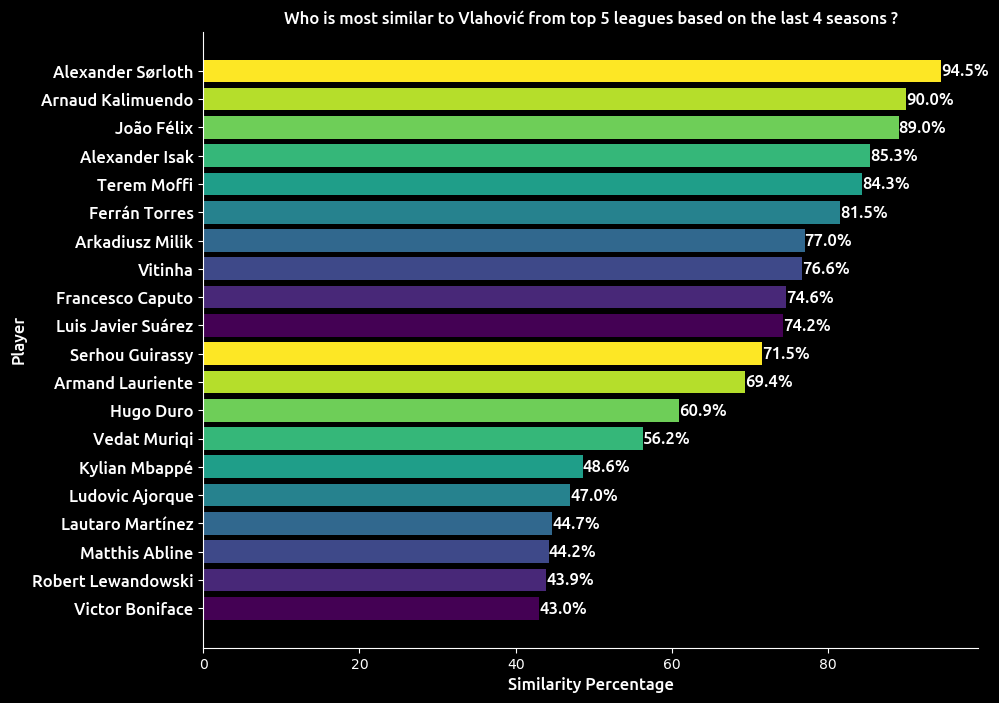

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the forward_players DataFrame by similarity_to_rice in descending order
forward_players_sorted = forward_players.sort_values(by='similarity_to_vlahovic', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(forward_players_sorted['Player'].head(20)[::-1], (forward_players_sorted['similarity_to_vlahovic'].head(20)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Vlahović from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(forward_players_sorted['Player'].head(20)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [22]:
Kalimuendo=forward_players[forward_players['Player']=='Arnaud Kalimuendo']
Kalimuendo

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_vlahovic
49,374,Arnaud Kalimuendo,fr FRA,FW,Rennes+Lens+Paris S-G+Paris S-G+Lens,fr Ligue 1,0.0,2002.0,123.0,90.0,756694,82.6,0.44,0.52,0.39,0.47,0.38,0.44,0.34,0.4,211.0,95.0,45.02,108.0,51.18,31.25,0.27,1.52,13.51,16.66,4.36,31.2,2.55,1.15,1.31,23.55,138.84,51.53,1.86,1.21,0.86,-2.93,-2.03,25.01,8.45,17.72,2.01,1.65,0.01,0.19,0.31,0.25,1.65,0.18,0.0,0.04,0.07,0.06,0.0,1413.0,1743.0,81.07,19439.0,2895.0,906.0,1047.0,85.55,460.0,532.0,86.47,50.0,68.0,73.53,0.05,0.11,0.08,-0.03,0.94,0.84,0.59,0.08,1.45,21.1,19.22,1.79,0.08,0.05,0.05,0.77,0.18,0.0,0.0,0.0,0.0,17.11,0.09,0.69,0.0,9.13,0.0,1.12,0.0,4.6,3.8,13.83,-0.08,-0.01,-0.0,-0.88,1.64,0.34,0.19,0.27,0.06,-0.0,2.18,0.33,-2.08,0.45,0.1,0.15,0.19,0.12,0.47,0.35,0.55,0.06,0.64,0.18,0.0,28.58,4,0,0,0,4,0,0.900055


In [23]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Ndayishimiye's stats from the percentile ranks DataFrame
Kalimuendo_percentile_ranks = round(players_percentile_ranks.iloc[[49]], 0)

# Print the percentile ranks for schlotterbeck
Kalimuendo_percentile_ranks

,Goals_per90,G+A_per90,Shot_Creating_Action_per90,npxG_per90,Shots_on_target_per90,Goal_Creating_Action_90,xG+xAG_per90,Shot_Goal_per_90,Dispossessed_per_90,Second_Yellow_Card_per_90,Red_Cards_per_90,G-PK_per90,xG_per90,Passes_TotDist,Passes_PrgDist
49,71.0,57.0,98.0,56.0,99.0,97.0,35.0,82.0,15.0,57.0,21.0,68.0,54.0,73.0,61.0


In [24]:
Kalimuendo_percentile_ranks_list = Kalimuendo_percentile_ranks.values.flatten().tolist()

Kalimuendo_percentile_ranks_list

[71.0,
 57.0,
 98.0,
 56.0,
 99.0,
 97.0,
 35.0,
 82.0,
 15.0,
 57.0,
 21.0,
 68.0,
 54.0,
 73.0,
 61.0]

In [25]:
image_path = "Kalimuendo.jpg"
fdj_cropped = Image.open(image_path)

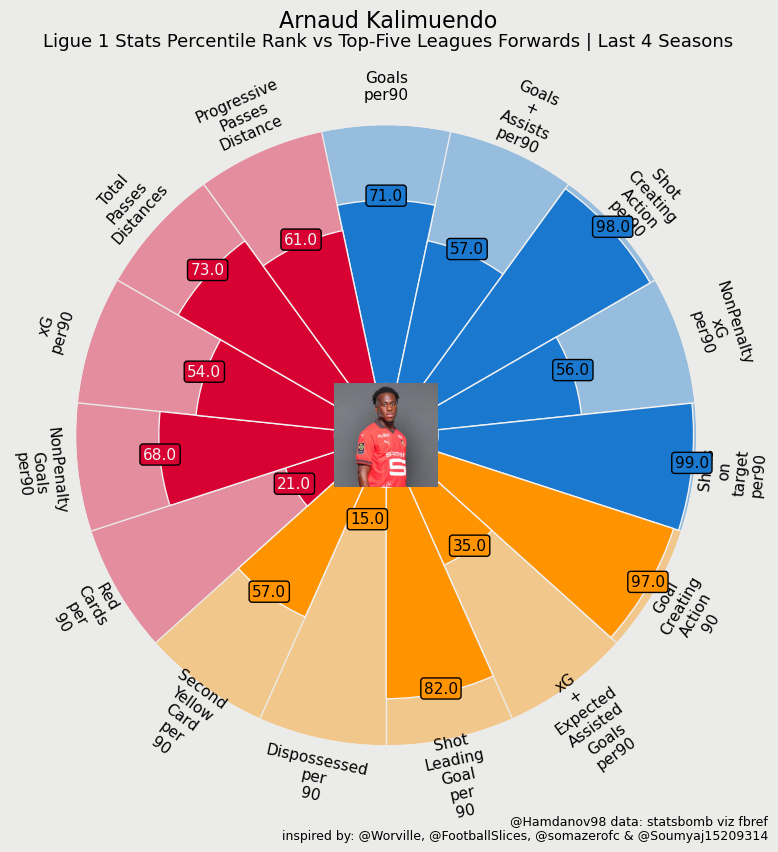

In [26]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Kalimuendo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Arnaud Kalimuendo", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Forwards | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kalimuendo_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png